In [2]:
import scipy.stats as st
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

import tqdm 
import tqdm.notebook
import scipy 
import pandas as pd
# temp: functions and more...
from optimization import *
from optimization_clean import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Effect of $\beta$

For a fixed $\lambda$ and different initializations of the selected cities, how does the value of value of $\beta$ affects the minimum value acheived for the objective function?

In [5]:
def effect_of_beta(n_iter, l, cities, beta_range, num_runs, mutation_strategy, 
                   init_prob):
    # dictionary to save the results
    results = {beta: [] for beta in beta_range}
    l = 0.8
    for beta in beta_range:
        np.random.seed(2)
        for i in range(num_runs):
            sel_c, sel_conv, loss, loss_convex = optimize(cities, l, beta=beta, 
                                          n_iter=n_iter, mutation_strategy=mutation_strategy,
                                          initial_selection_probability=init_prob,
                                          precompute_pairwise_dist=False, verbose=False)
            # save the result
            results[beta].append(loss_convex)
    return results

In [6]:
N = 100
num_iter = 5000
num_runs = 10
l = 0.4
beta_range = [5, 10, 25, 50, 100, 1000]
g = G1(N)
mutation_strategy=3
init_prob=1/N
r_G1 = effect_of_beta(num_iter, l, g, beta_range, num_runs, mutation_strategy, init_prob)

g = G2(N)
r_G2 = effect_of_beta(num_iter, l, g, beta_range, num_runs, mutation_strategy, init_prob)

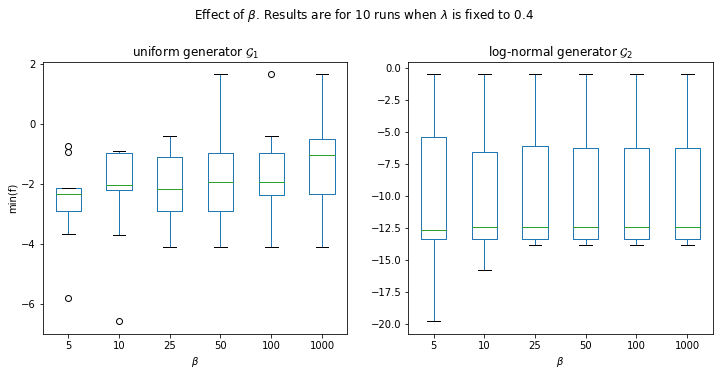

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df = pd.DataFrame(r_G1)
fig.text(0.3, 1, r"Effect of $\beta$. Results are for {} runs when $\lambda$ is fixed to {}".format(num_runs, l), fontsize=12)
df.plot(ax = ax[0], kind="box", title= r"uniform generator $\mathcal{G}_1$")
df = pd.DataFrame(r_G2)
df.plot(ax = ax[1], kind="box", title= r"log-normal generator $\mathcal{G}_2$")
ax[1].set_xlabel(r"$\beta$")
ax[0].set_xlabel(r"$\beta$")
ax[0].set_ylabel("min(f)");

### How do the values $\mathbb{E}_{\mathcal{G}} [|\mathcal{S}^{\ast}(\lambda)|]$ and $\mathbb{E}_{\mathcal{G}} [f(\lambda, \mathcal{S}^{\ast}(\lambda))]$ evolve with respect to $\lambda$?

For now we fix $\beta = 10$, to run this experiment.

In [3]:
n_iter = 10000
def beta(i):
    if i < n_iter * (1/5) :
        return 1
    elif i < n_iter * (2/5):
        return 5
    elif i < n_iter * (3/5):
        return 10
    elif i < n_iter * (4/5):
        return 20
    else: 
        return 50

In [4]:
def effect_of_lambda(n_iter, beta, generator, N, lambda_range, num_runs, mutation_strategy, init_prob):
    # dictionary to save the results
    results_f = {l: [] for l in lambda_range}
    results_num_cities = {l: [] for l in lambda_range}
    for i in range(num_runs):
        cities = generator(N)
        for l in lambda_range:
            if mutation_strategy == 5:
                sel_c_conv, loss_convex = optimize(
                        cities, l, beta=beta, n_iter=n_iter, verbose=False, use_kd_tree=True)
            else:
                sel_c, sel_c_conv, loss_values, loss_convex = optimize_1234(cities, l, beta=beta, 
                                          n_iter=n_iter,mutation_strategy=mutation_strategy,
                                          initial_selection_probability=init_prob,
                                          precompute_pairwise_dist=False, verbose=False)
            # save the result
            results_f[l].append(loss_convex)
            if mutation_strategy == 5:
                results_num_cities[l].append(sum(sel_c_conv[-1]))
            else:
                results_num_cities[l].append(sum(sel_c_conv))
    return results_num_cities, results_f

In [14]:
N = 1000
num_iter = 10000
num_runs = 10
lambda_range = [0, 0.2, 0.4, 0.6, 0.8, 1]
# mutation_strategy=3
init_prob=0.0

r_G1_num_cities={0: [], 1: [], 2: [], 3: []}
r_G1_f={0: [], 1: [], 2: [], 3: []}

r_G2_num_cities={0: [], 1: [], 2: [], 3: []}
r_G2_f={0: [], 1: [], 2: [], 3: []}
for i in [0, 1, 3, 5]:
    r_G1_num_cities[i], r_G1_f[i] =  effect_of_lambda(num_iter, beta, G1, N, lambda_range, num_runs, mutation_strategy=i, init_prob=init_prob)

    r_G2_num_cities[i], r_G2_f[i] =  effect_of_lambda(num_iter, beta, G2, N, lambda_range, num_runs, mutation_strategy=i, init_prob=init_prob)
    print("strategy {} finished".format(i))

strategy 0 finished
strategy 1 finished
strategy 3 finished
Convex  -255.13824037584502  vs  -255.13824037584507
Convex  -7.496944338103102  vs  -7.496944338103104
Convex  -4.1539063761731665  vs  -5.597664525233282
Convex  -6.475285563559069  vs  -6.475285563559071
Convex  -3.7855784809892263  vs  -4.0884040759245766
Convex  -498.5158426193228  vs  -498.65790061843205
Convex  -234.6719878260592  vs  -234.67198782605925
Convex  -3.1958597346157873  vs  -4.999426549209958
Convex  -7.040075745574007  vs  -7.040075745574009
Convex  -4.741732836364207  vs  -4.741732836364209
Convex  -3.2265982456781366  vs  -3.2265982456781375
Convex  -7.151159083660488  vs  -7.151159083660492
Convex  -9.629079175957445  vs  -10.274922579627214
Convex  -4.491084458841391  vs  -4.491084458841393
Convex  -6.993124072657793  vs  -7.1877264368362574
Convex  -941.2609162518702  vs  -941.2609162518704
Convex  -1070.5669203395678  vs  -1070.566920339568
Convex  -367.8131244593799  vs  -367.81312445938
Convex  -11

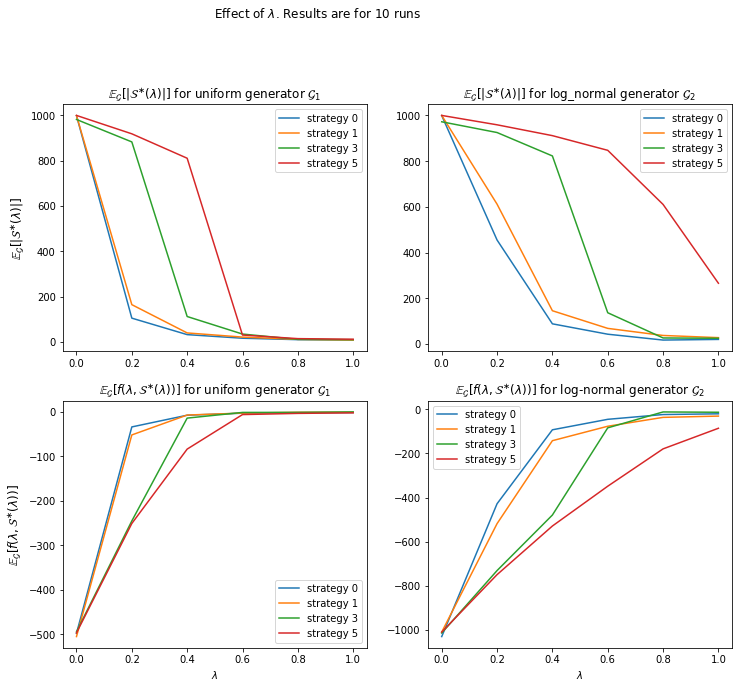

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

fig.text(0.3, 1, r"Effect of $\lambda$. Results are for {} runs".format(num_runs), fontsize=12)
for i in [0, 1, 3, 5]:
    ax[0][0].plot(lambda_range, [np.mean(i) for i in r_G1_num_cities[i].values()], label="strategy {}".format(i))
    ax[0][0].set_title(r"$\mathbb{E}_{\mathcal{G}} [|\mathcal{S}^{\ast}(\lambda)|]$ for uniform generator $\mathcal{G}_1$")
    ax[0][0].legend()

for i in [0, 1, 3, 5]:
    ax[0][1].plot(lambda_range, [np.mean(i) for i in r_G2_num_cities[i].values()], label="strategy {}".format(i))
    ax[0][1].set_title(r"$\mathbb{E}_{\mathcal{G}} [|\mathcal{S}^{\ast}(\lambda)|]$ for log_normal generator $\mathcal{G}_2$")
    ax[0][1].legend()

for i in [0, 1, 3, 5]:
    ax[1][0].plot(lambda_range, [np.mean(i) for i in r_G1_f[i].values()], label="strategy {}".format(i))
    ax[1][0].set_title(r"$\mathbb{E}_{\mathcal{G}} [f(\lambda, \mathcal{S}^{\ast}(\lambda))]$ for uniform generator $\mathcal{G}_1$")
    ax[1][0].legend()
    
for i in [0, 1, 3, 5]:
    ax[1][1].plot(lambda_range, [np.mean(i) for i in r_G2_f[i].values()], label="strategy {}".format(i))
    ax[1][1].set_title(r"$\mathbb{E}_{\mathcal{G}} [f(\lambda, \mathcal{S}^{\ast}(\lambda))]$ for log-normal generator $\mathcal{G}_2$")
    ax[1][1].legend()
    
ax[1][0].set_xlabel(r"$\lambda$")
ax[1][1].set_xlabel(r"$\lambda$")
ax[0][0].set_ylabel(r"$\mathbb{E}_{\mathcal{G}} [|\mathcal{S}^{\ast}(\lambda)|]$", fontsize=12)
ax[1][0].set_ylabel(r"$\mathbb{E}_{\mathcal{G}} [f(\lambda, \mathcal{S}^{\ast}(\lambda))]$", fontsize=12)
fig.savefig("Expectation_f_num_cities_{}.pdf".format(N), dpi=1200);